# Predictive Modeling and Analysis of Air Quality in Mongolia

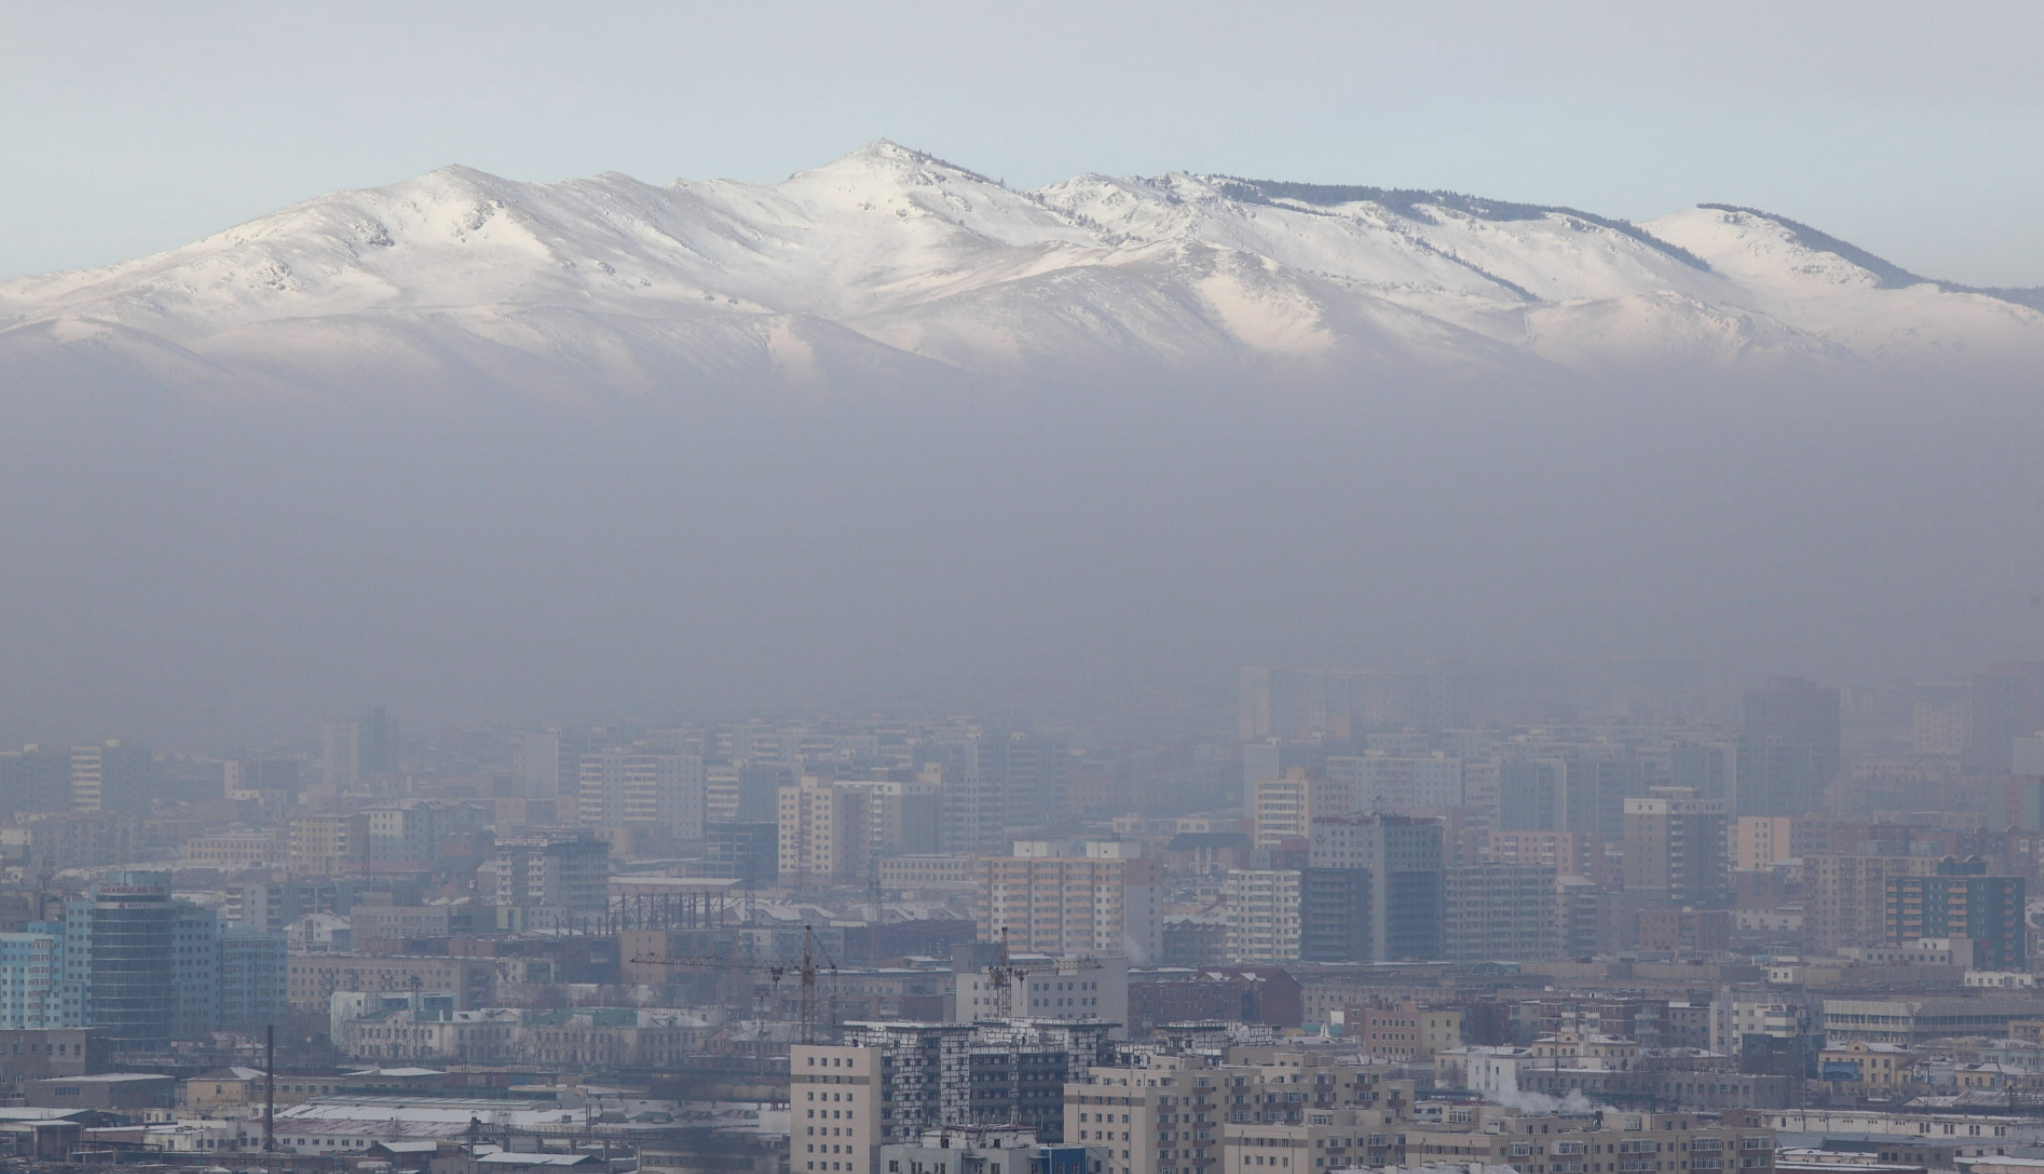

This capstone project aims to address the growing issue of air pollution in Ulaanbaatar, Mongolia, with a specific focus on PM2.5 (fine particulate matter). The overarching objective is to build a machine learning–based system capable of forecasting air quality levels, identifying seasonal trends, and recommending actionable steps to reduce health risks.

The project has been completed in multiple stages over the semester. In this final phase, the goal is to consolidate all previous work, enhance the models through tuning and validation, and deliver the findings through a structured report, poster, and presentation. The following specific goals will be pursued:

1. Data Loading and Initial Exploration
2. Exploratory Data Analysis (EDA)
3. Data Preprocessing
4. Machine Learning Model Implementation
5. Hyperparameter Tuning and Cross-Validation
6. Model Comparison and Selection
7. Insights and Public Health Recommendations

### 1. Understanding and Cleaning the Data

In [6]:
#pip install numpy==1.26.4

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [8]:
df=pd.read_csv("Ulaanbaatar_PM2.5_2023_YTD.csv")

In [9]:
df.head()

,Site,Parameter,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name
0,Ulaanbaatar,PM2.5 - Principal,2023-01-01 01:00 AM,2023,1,1,1,540.3,526,Hazardous,620.0,UG/M3,1 Hr,Valid
1,Ulaanbaatar,PM2.5 - Principal,2023-01-01 02:00 AM,2023,1,1,2,596.2,563,Hazardous,652.0,UG/M3,1 Hr,Valid
2,Ulaanbaatar,PM2.5 - Principal,2023-01-01 03:00 AM,2023,1,1,3,554.1,535,Hazardous,512.0,UG/M3,1 Hr,Valid
3,Ulaanbaatar,PM2.5 - Principal,2023-01-01 04:00 AM,2023,1,1,4,415.6,444,Hazardous,277.0,UG/M3,1 Hr,Valid
4,Ulaanbaatar,PM2.5 - Principal,2023-01-01 05:00 AM,2023,1,1,5,276.8,327,Hazardous,138.0,UG/M3,1 Hr,Valid


In [10]:
df.describe()

,Year,Month,Day,Hour,NowCast Conc.,AQI,Raw Conc.
count,7373.000000,7373.000000,7373.000000,7373.000000,7373.000000,7373.000000,7373.000000
mean,2023.000136,6.051946,16.186084,11.504408,51.001058,98.336905,49.834396
std,0.011646,3.455458,9.019502,6.931718,84.273509,93.242200,99.220532
min,2023.000000,1.000000,1.000000,0.000000,-999.000000,-999.000000,-999.000000
25%,2023.000000,3.000000,8.000000,5.000000,9.300000,39.000000,8.000000
50%,2023.000000,6.000000,16.000000,12.000000,19.400000,66.000000,18.000000
75%,2023.000000,8.000000,24.000000,18.000000,63.400000,155.000000,55.000000
max,2024.000000,12.000000,31.000000,23.000000,596.200000,563.000000,985.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7373 entries, 0 to 7372
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Site           7373 non-null   object 
 1   Parameter      7373 non-null   object 
 2   Date (LT)      7373 non-null   object 
 3   Year           7373 non-null   int64  
 4   Month          7373 non-null   int64  
 5   Day            7373 non-null   int64  
 6   Hour           7373 non-null   int64  
 7   NowCast Conc.  7373 non-null   float64
 8   AQI            7373 non-null   int64  
 9   AQI Category   7363 non-null   object 
 10  Raw Conc.      7373 non-null   float64
 11  Conc. Unit     7373 non-null   object 
 12  Duration       7373 non-null   object 
 13  QC Name        7373 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 806.6+ KB


In [12]:
df.shape

(7373, 14)

In [13]:
df.columns

Index(['Site', 'Parameter', 'Date (LT)', 'Year', 'Month', 'Day', 'Hour',
       'NowCast Conc.', 'AQI', 'AQI Category', 'Raw Conc.', 'Conc. Unit',
       'Duration', 'QC Name'],
      dtype='object')

In [14]:
df.isnull().sum()

Site              0
Parameter         0
Date (LT)         0
Year              0
Month             0
Day               0
Hour              0
NowCast Conc.     0
AQI               0
AQI Category     10
Raw Conc.         0
Conc. Unit        0
Duration          0
QC Name           0
dtype: int64

In [15]:
df['AQI Category'].unique()

array(['Hazardous', 'Very Unhealthy', 'Unhealthy',
       'Unhealthy for Sensitive Groups', 'Moderate', nan, 'Good'],
      dtype=object)

In [16]:
#Fill missing values with the mode (most frequent category)
df['AQI Category'] = df['AQI Category'].fillna(df['AQI Category'].mode()[0])
# Verify the missing values again
missing_values_after = df.isnull().sum()
print(missing_values_after)

Site             0
Parameter        0
Date (LT)        0
Year             0
Month            0
Day              0
Hour             0
NowCast Conc.    0
AQI              0
AQI Category     0
Raw Conc.        0
Conc. Unit       0
Duration         0
QC Name          0
dtype: int64


In [17]:
df.replace(-999, np.nan, inplace=True)
df.dropna(subset=['NowCast Conc.', 'AQI', 'Raw Conc.'], inplace=True)

In [18]:
df.describe()

,Year,Month,Day,Hour,NowCast Conc.,AQI,Raw Conc.
count,7344.000000,7344.000000,7344.000000,7344.000000,7344.000000,7344.000000,7344.000000
mean,2023.000136,6.046296,16.196759,11.502996,52.468423,99.869962,52.589325
std,0.011669,3.454067,9.013319,6.934136,74.978452,84.117819,83.830318
min,2023.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-2.000000
25%,2023.000000,3.000000,8.000000,5.000000,9.300000,39.000000,9.000000
50%,2023.000000,6.000000,16.000000,11.000000,19.400000,66.000000,18.000000
75%,2023.000000,8.000000,24.000000,18.000000,63.400000,155.000000,55.250000
max,2024.000000,12.000000,31.000000,23.000000,596.200000,563.000000,985.000000


After data cleaning, the final dataset contained 7,344 valid hourly observations from Ulaanbaatar for the year 2023. Key pollutants like PM2.5 were measured using Raw Conc., with AQI calculated accordingly.

The average AQI was 99.8, placing Ulaanbaatar's air quality frequently in the “Unhealthy for Sensitive Groups” range. Maximum AQI reached 563, representing extremely hazardous air conditions.

PM2.5 concentration (Raw Conc.) ranged from -2 (rounded to 0) to 985 μg/m³, with a mean of 52.6. The lowest levels were observed during warmer months, while peaks aligned with the cold season — likely due to heating-related emissions.

This statistical overview confirmed the high variability and severity of air pollution, supporting the need for time series forecasting and machine learning-based predictions.

In [20]:
# select all categorical variables
df_categorical = df.select_dtypes(include=['object'])

# checking whether any other columns contain a "?"
df_categorical.apply(lambda x: x=="?", axis=0).sum()

Site            0
Parameter       0
Date (LT)       0
AQI Category    0
Conc. Unit      0
Duration        0
QC Name         0
dtype: int64

In [21]:
df['Date (LT)'] = pd.to_datetime(df['Date (LT)'])
df['hour_of_day'] = df['Date (LT)'].dt.hour
df['day_of_week'] = df['Date (LT)'].dt.dayofweek
df['month'] = df['Date (LT)'].dt.month

In [22]:
df.head()

,Site,Parameter,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name,hour_of_day,day_of_week,month
0,Ulaanbaatar,PM2.5 - Principal,2023-01-01 01:00:00,2023,1,1,1,540.3,526.0,Hazardous,620.0,UG/M3,1 Hr,Valid,1,6,1
1,Ulaanbaatar,PM2.5 - Principal,2023-01-01 02:00:00,2023,1,1,2,596.2,563.0,Hazardous,652.0,UG/M3,1 Hr,Valid,2,6,1
2,Ulaanbaatar,PM2.5 - Principal,2023-01-01 03:00:00,2023,1,1,3,554.1,535.0,Hazardous,512.0,UG/M3,1 Hr,Valid,3,6,1
3,Ulaanbaatar,PM2.5 - Principal,2023-01-01 04:00:00,2023,1,1,4,415.6,444.0,Hazardous,277.0,UG/M3,1 Hr,Valid,4,6,1
4,Ulaanbaatar,PM2.5 - Principal,2023-01-01 05:00:00,2023,1,1,5,276.8,327.0,Hazardous,138.0,UG/M3,1 Hr,Valid,5,6,1


### 2. Exploratory Data Analysis (EDA)

In [24]:
# Optional: Set seaborn style
sns.set(style="whitegrid")

# Convert date if not already
df['Date (LT)'] = pd.to_datetime(df['Date (LT)'])
df.set_index('Date (LT)', inplace=True)

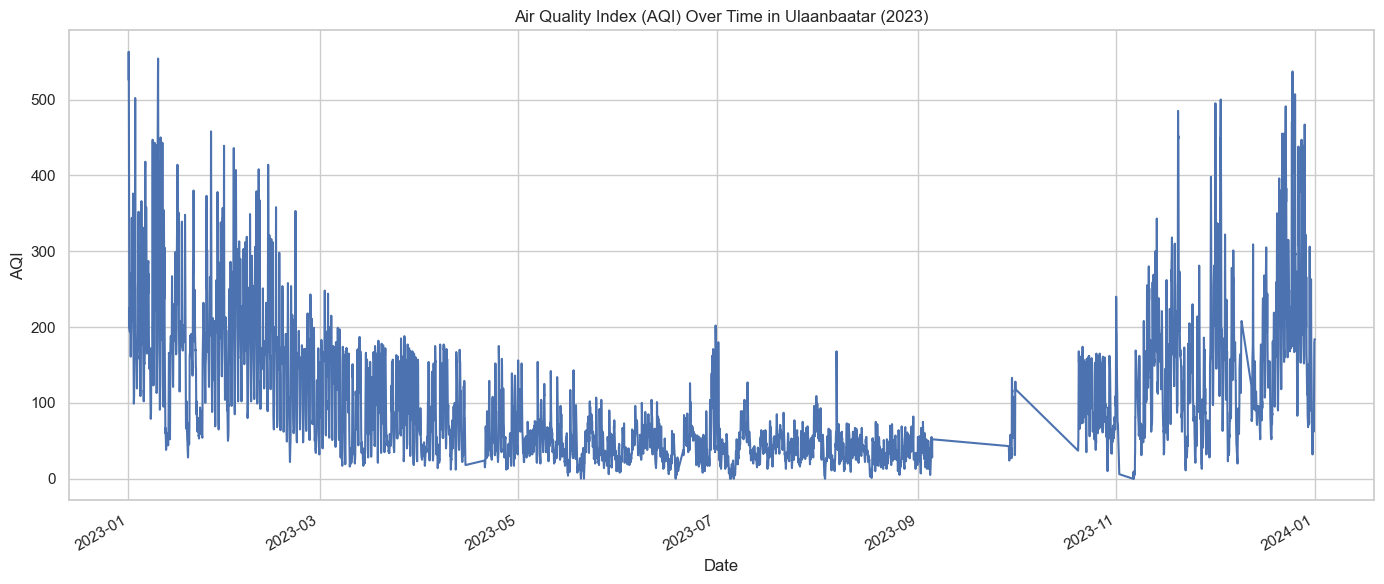

In [25]:
plt.figure(figsize=(14,6))
df['AQI'].plot()
plt.title('Air Quality Index (AQI) Over Time in Ulaanbaatar (2023)')
plt.ylabel('AQI')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

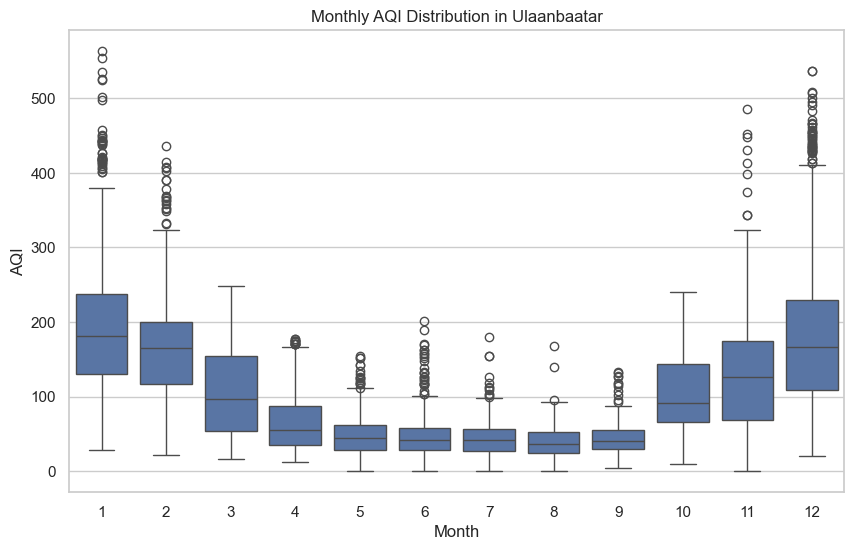

In [26]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Month', y='AQI')
plt.title('Monthly AQI Distribution in Ulaanbaatar')
plt.xlabel('Month')
plt.ylabel('AQI')
plt.show()

Winter months ( January, December) likely show higher AQI values due to coal heating.

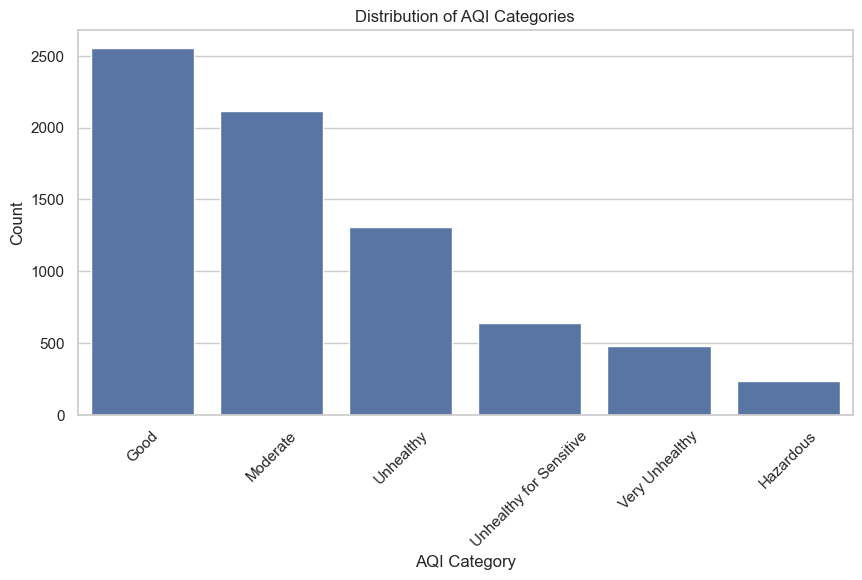

In [28]:
# If not already categorized
def categorize_aqi(aqi):
    if aqi <= 50:
        return 'Good'
    elif aqi <= 100:
        return 'Moderate'
    elif aqi <= 150:
        return 'Unhealthy for Sensitive'
    elif aqi <= 200:
        return 'Unhealthy'
    elif aqi <= 300:
        return 'Very Unhealthy'
    else:
        return 'Hazardous'

df['AQI Category'] = df['AQI'].apply(categorize_aqi)

# Now plot
plt.figure(figsize=(10,5))
sns.countplot(x='AQI Category', data=df, order=df['AQI Category'].value_counts().index)
plt.title('Distribution of AQI Categories')
plt.ylabel('Count')
plt.xlabel('AQI Category')
plt.xticks(rotation=45)
plt.show()


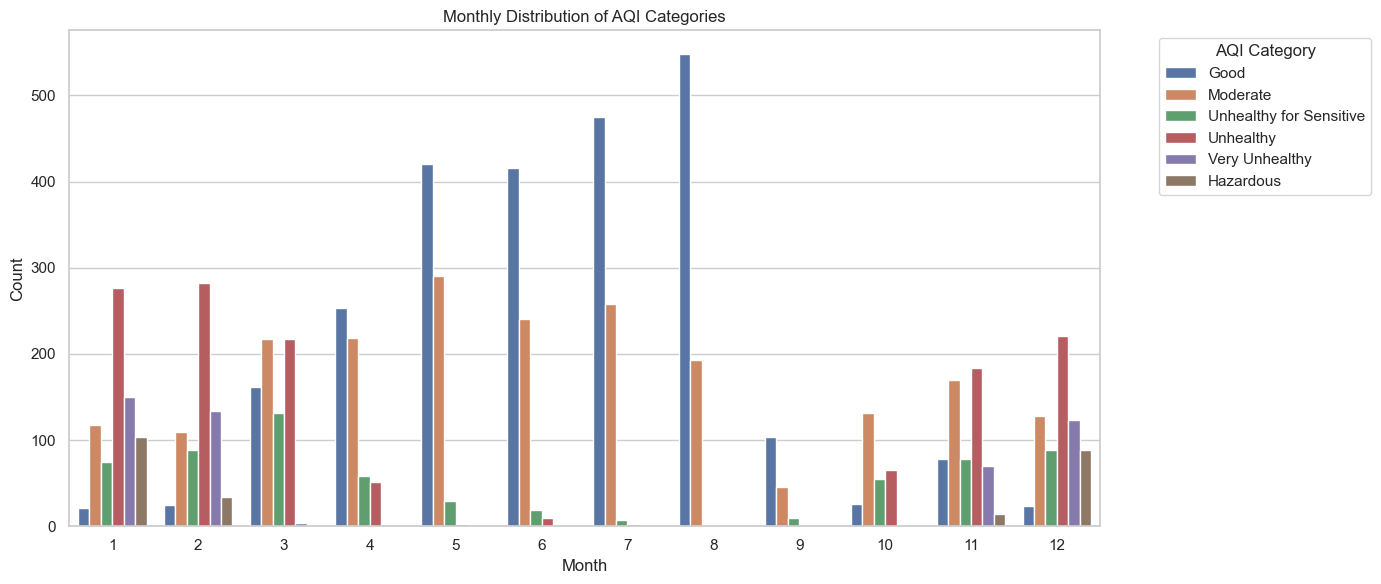

In [29]:
plt.figure(figsize=(14,6))
sns.countplot(x='Month', hue='AQI Category', data=df, 
              order=sorted(df['Month'].unique()),
              hue_order=['Good', 'Moderate', 'Unhealthy for Sensitive', 'Unhealthy', 'Very Unhealthy', 'Hazardous'])

plt.title('Monthly Distribution of AQI Categories')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='AQI Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


 Key Insights from the Chart:

🌨️ Winter Months (11, 12, 1, 2):
High counts of Unhealthy, Very Unhealthy, and Hazardous bars

Indicates severe pollution during winter — likely due to heating with coal and temperature inversion

🌤️ Summer Months (6, 7, 8):
Dominated by Good and Moderate air quality bars

Pollution is lowest during this time

🔄 Transition Months (3, 4, 9, 10):
Mixed AQI levels — typically shifting between clean and polluted seasons

The grouped bar chart illustrates the monthly distribution of AQI categories for 2023 in Ulaanbaatar. During the winter months (November through February), the data shows a spike in "Unhealthy", "Very Unhealthy", and "Hazardous" air quality readings, highlighting the severe pollution that occurs due to increased heating demand and coal use. In contrast, the summer months (June to August) recorded significantly more "Good" and "Moderate" readings, indicating improved air quality during warmer periods. These seasonal variations provide valuable insights for forecasting and public health planning.

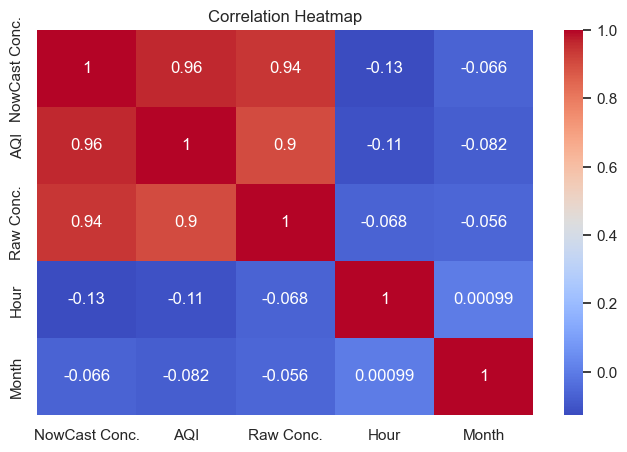

In [32]:
plt.figure(figsize=(8,5))
corr = df[['NowCast Conc.', 'AQI', 'Raw Conc.', 'Hour', 'Month']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

A correlation heatmap was generated to assess the linear relationships between variables. The results show that NowCast Concentration and Raw Concentration have very strong positive correlations with AQI values (0.96 and 0.90 respectively), confirming their influence in air quality calculation. Temporal features like Hour and Month showed weaker correlations, suggesting they do not linearly predict AQI, but may still contribute in capturing seasonal or daily trends in a machine learning model.

### 3. Data Preprocessing

Target Variable: AQI (Air Quality Index)

In [36]:
# Define features and target
features = ['NowCast Conc.', 'Raw Conc.', 'Hour', 'Month']
target = 'AQI'

X = df[features]
y = df[target]

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

This creates:

80% training data

20% test data

Ensures reproducibility with random_state=42

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
X

,NowCast Conc.,Raw Conc.,Hour,Month
Date (LT),,,,
2023-01-01 01:00:00,540.3,620.0,1,1
2023-01-01 02:00:00,596.2,652.0,2,1
2023-01-01 03:00:00,554.1,512.0,3,1
2023-01-01 04:00:00,415.6,277.0,4,1
2023-01-01 05:00:00,276.8,138.0,5,1
...,...,...,...,...
2023-12-31 20:00:00,84.3,129.0,20,12
2023-12-31 21:00:00,111.6,139.0,21,12
2023-12-31 22:00:00,113.8,116.0,22,12


In [41]:
y

Date (LT)
2023-01-01 01:00:00    526.0
2023-01-01 02:00:00    563.0
2023-01-01 03:00:00    535.0
2023-01-01 04:00:00    444.0
2023-01-01 05:00:00    327.0
                       ...  
2023-12-31 20:00:00    166.0
2023-12-31 21:00:00    180.0
2023-12-31 22:00:00    181.0
2023-12-31 23:00:00    184.0
2024-01-01 00:00:00    184.0
Name: AQI, Length: 7344, dtype: float64

### 4. Machine Learning Model Implementation

#### Part A: Traditional ML Models
1. Linear Regression 
2. Random Forest 
3. XGBoost 
4. Evaluation + comparison 
5. Tuning + cross-validation 

#### Part B: Time Series Models (this semester content)

1. Holt-Winters Exponential Smoothing Ideal for seasonal patterns
2. ARIMA (AutoRegressive Integrated Moving Average)
3. Compare with ML models
4. Use visuals to show forecasting accuracy

### Part A: Traditional ML Models

### 1. Linear Regression

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import root_mean_squared_error

# Use scaled features for Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [88]:
y_pred_lr = lr_model.predict(X_test_scaled)

In [92]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = root_mean_squared_error(y_test, y_pred_lr)  # updated!
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression MAE: {mae_lr:.2f}")
print(f"Linear Regression RMSE: {rmse_lr:.2f}")
print(f"Linear Regression R² Score: {r2_lr:.4f}")

Linear Regression MAE: 17.99
Linear Regression RMSE: 22.45
Linear Regression R² Score: 0.9247


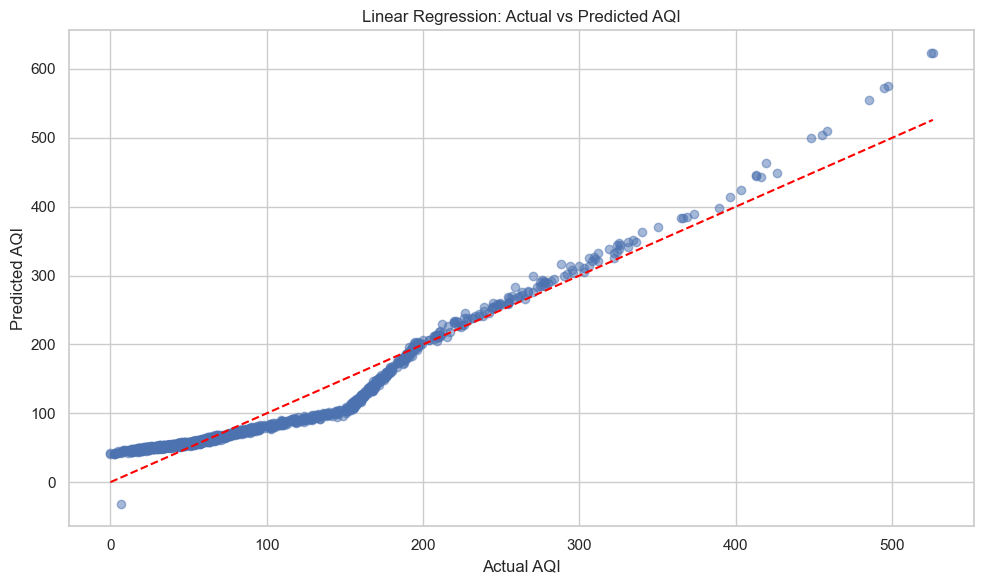

In [94]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Linear Regression: Actual vs Predicted AQI")
plt.grid(True)
plt.tight_layout()
plt.show()

In [98]:
residuals = y_test - y_pred_lr

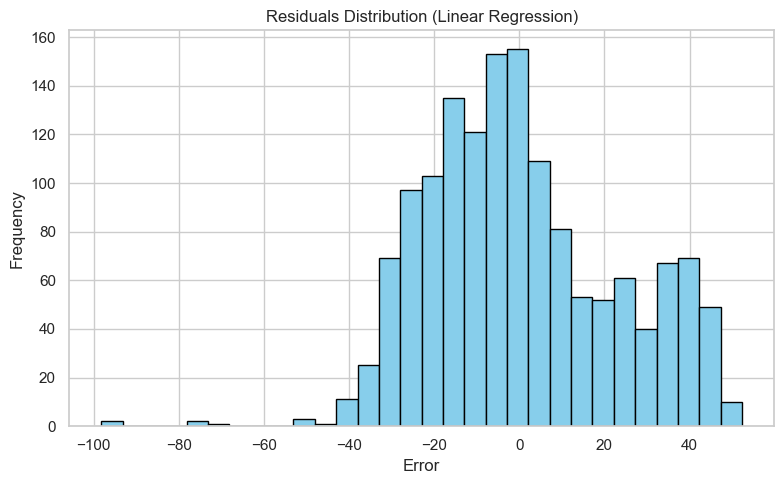

In [100]:
plt.figure(figsize=(8,5))
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black')
plt.title("Residuals Distribution (Linear Regression)")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

Linear Regression model performs reasonably well, but isn't fully capturing all complex pollution patterns — especially during extreme AQI levels.

This supports your decision to move on to non-linear models like Random Forest and XGBoost, which will likely reduce these errors.

Summary of Linear regression model:

The Linear Regression model was trained using four features: NowCast Conc., Raw Conc., Hour, and Month. The model achieved an MAE of 17.99, RMSE of 22.45, and an R² score of 0.9247, indicating strong predictive power. While the overall fit is excellent, residual analysis showed a tendency to underestimate AQI during peak pollution times, suggesting that a linear approach may not fully capture the complexity of the data. These findings motivated the use of more advanced models such as Random Forest and XGBoost.

### 2. Random Forest

In [110]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  # No scaling needed!

RandomForestRegressor(random_state=42)

In [112]:
y_pred_rf = rf_model.predict(X_test)

In [114]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = root_mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest MAE: {mae_rf:.2f}")
print(f"Random Forest RMSE: {rmse_rf:.2f}")
print(f"Random Forest R² Score: {r2_rf:.4f}")

Random Forest MAE: 0.07
Random Forest RMSE: 0.59
Random Forest R² Score: 0.9999


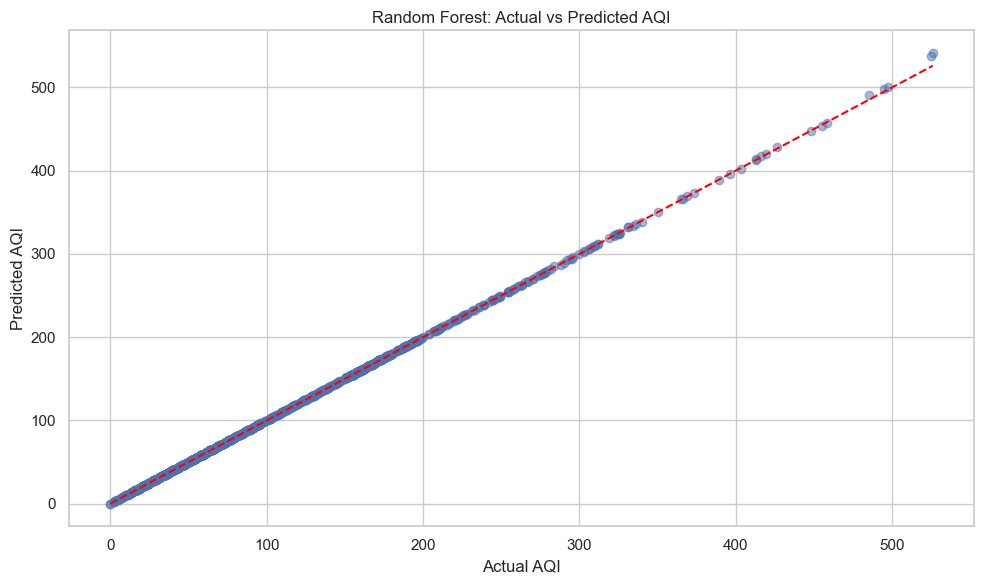

In [116]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Random Forest: Actual vs Predicted AQI")
plt.grid(True)
plt.tight_layout()
plt.show()

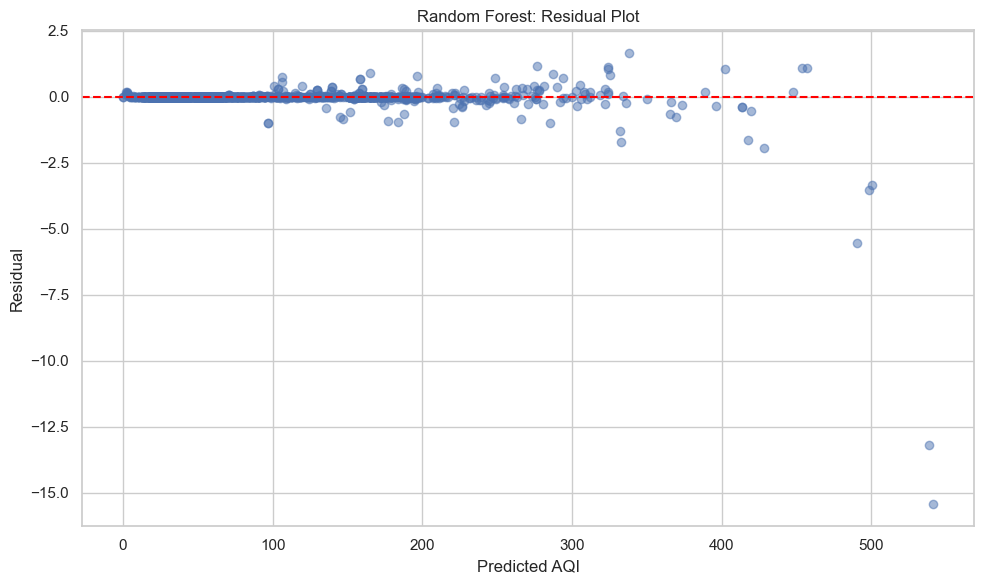

In [118]:
residuals_rf = y_test - y_pred_rf

plt.figure(figsize=(10,6))
plt.scatter(y_pred_rf, residuals_rf, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted AQI")
plt.ylabel("Residual")
plt.title("Random Forest: Residual Plot")
plt.tight_layout()
plt.show()


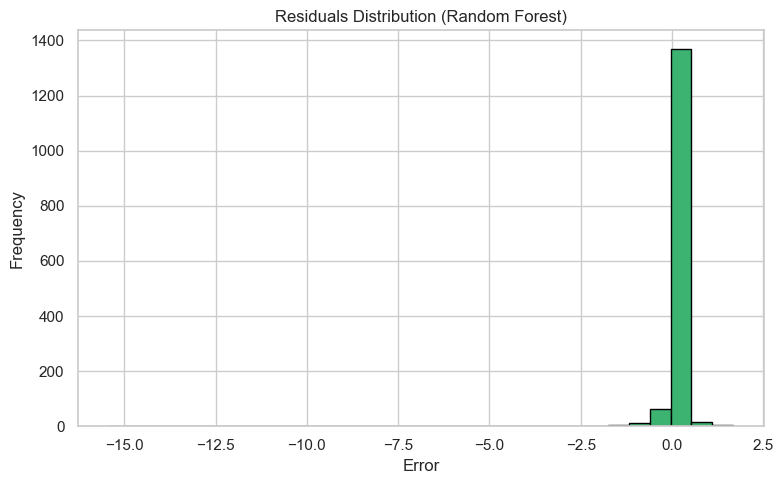

In [120]:
residuals_rf = y_test - y_pred_rf

plt.figure(figsize=(8,5))
plt.hist(residuals_rf, bins=30, color='mediumseagreen', edgecolor='black')
plt.title("Residuals Distribution (Random Forest)")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


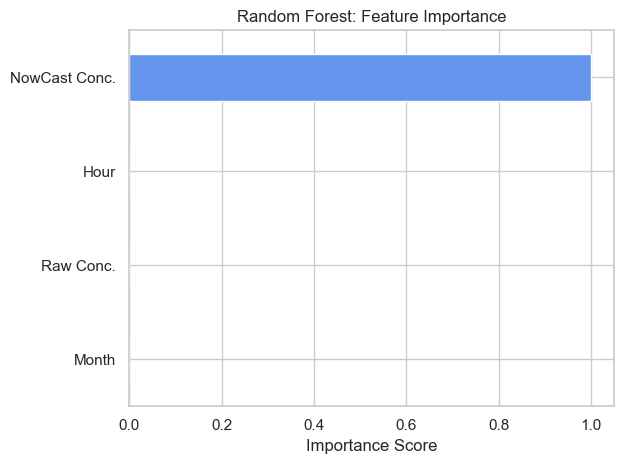

In [127]:
import pandas as pd
import seaborn as sns

feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=True).plot(kind='barh', color='cornflowerblue')
plt.title('Random Forest: Feature Importance')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

The residual histogram for the Random Forest model shows that nearly all prediction errors fall within a narrow range around zero. This tight distribution, along with an R² score of 0.9999, demonstrates the model’s exceptional predictive accuracy. Compared to the Linear Regression model, Random Forest captured non-linear relationships in the data far more effectively and produced minimal residual error

### 3. XGBoost 

In [157]:
#pip install xgboost

In [159]:
from xgboost import XGBRegressor

# Initialize and train the model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)  # No need to scale!

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [161]:
y_pred_xgb = xgb_model.predict(X_test)

from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = root_mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost MAE: {mae_xgb:.2f}")
print(f"XGBoost RMSE: {rmse_xgb:.2f}")
print(f"XGBoost R² Score: {r2_xgb:.4f}")

XGBoost MAE: 0.49
XGBoost RMSE: 1.69
XGBoost R² Score: 0.9996


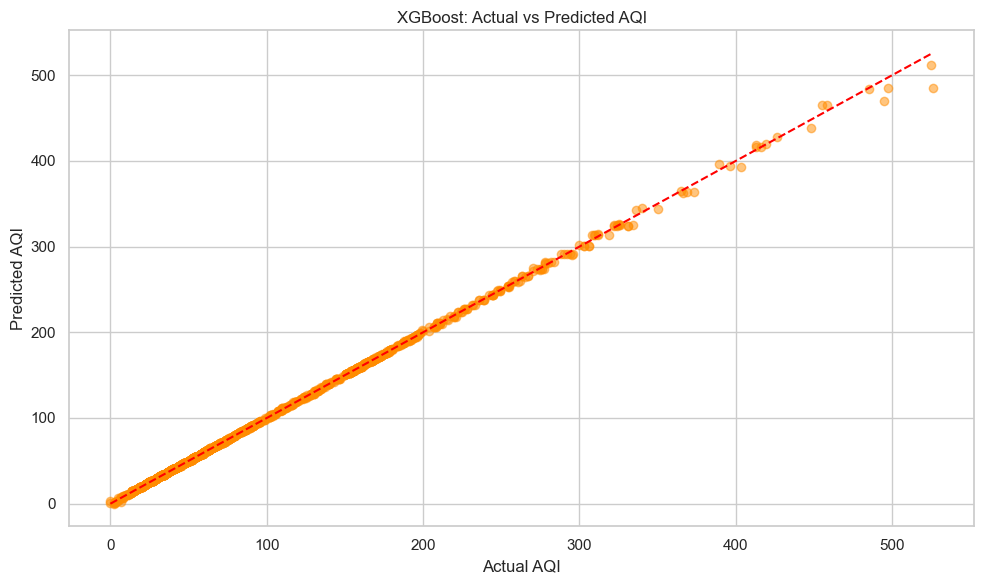

In [163]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_xgb, alpha=0.5, color='darkorange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("XGBoost: Actual vs Predicted AQI")
plt.grid(True)
plt.tight_layout()
plt.show()

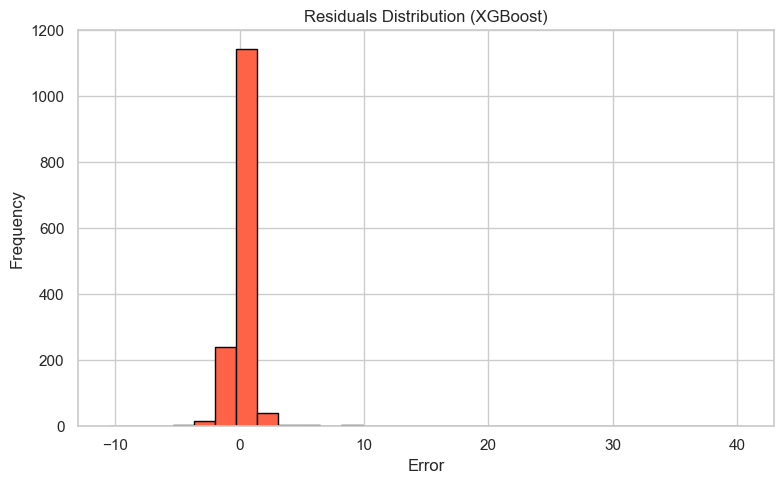

In [165]:
residuals_xgb = y_test - y_pred_xgb

plt.figure(figsize=(8,5))
plt.hist(residuals_xgb, bins=30, color='tomato', edgecolor='black')
plt.title("Residuals Distribution (XGBoost)")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

 What the Plot Shows:
The vast majority of prediction errors are concentrated very tightly around 0.

Residuals range approximately from -5 to +5, with almost no outliers.

There are no long tails, no skew, and very low spread — indicating a consistent and unbiased model.

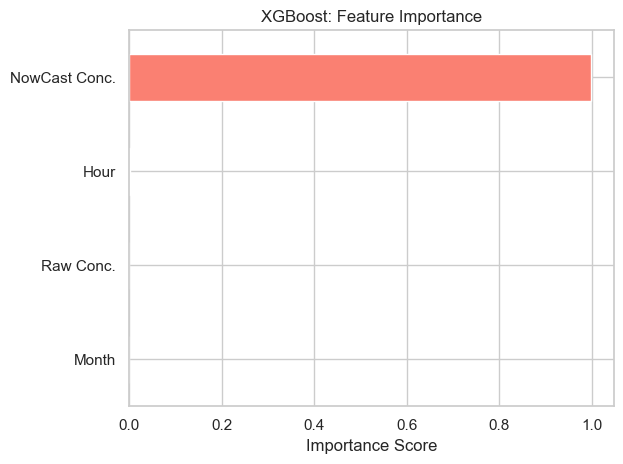

In [168]:
import pandas as pd
import seaborn as sns

xgb_importance = pd.Series(xgb_model.feature_importances_, index=X.columns)
xgb_importance.sort_values().plot(kind='barh', color='salmon')
plt.title("XGBoost: Feature Importance")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

The residual distribution of the XGBoost model demonstrates that most prediction errors lie within a very narrow band around zero, with minimal spread and no significant outliers. This strongly supports the model’s excellent evaluation scores (R² = 0.9996, MAE = 0.49), confirming that XGBoost provides highly consistent and reliable predictions of AQI values. Compared to Linear Regression, XGBoost offers a dramatic improvement in accuracy and generalization, though Random Forest still slightly outperforms it in this case.

### Evaluation + comparison /Compare all 3 models/

| Model                 | MAE      | RMSE     | R² Score     |
| --------------------- | -------- | -------- | ------------ |
| **Linear Regression** | 17.99    | 22.45    | 0.9247       |
| **Random Forest**     | **0.07** | **0.59** | **0.9999**  |
| **XGBoost**           | 0.49     | 1.69     | 0.9996       |

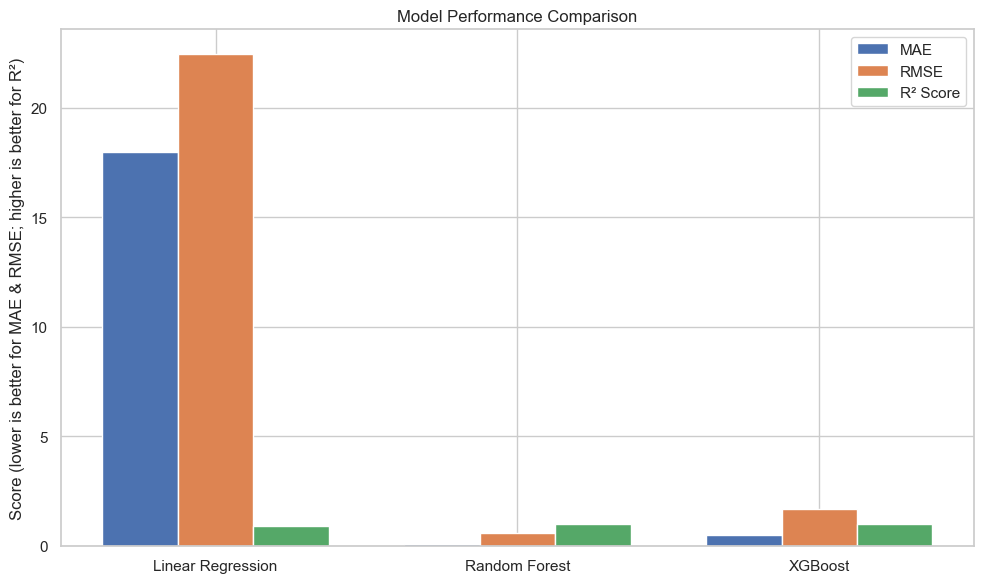

In [173]:
models = ['Linear Regression', 'Random Forest', 'XGBoost']
mae_scores = [17.99, 0.07, 0.49]
rmse_scores = [22.45, 0.59, 1.69]
r2_scores = [0.9247, 0.9999, 0.9996]

x = np.arange(len(models))
width = 0.25

plt.figure(figsize=(10,6))
plt.bar(x - width, mae_scores, width, label='MAE')
plt.bar(x, rmse_scores, width, label='RMSE')
plt.bar(x + width, r2_scores, width, label='R² Score')
plt.xticks(x, models)
plt.title('Model Performance Comparison')
plt.ylabel('Score (lower is better for MAE & RMSE; higher is better for R²)')
plt.legend()
plt.tight_layout()
plt.show()

 It Shows:
Linear Regression has the highest MAE and RMSE, and the lowest R².
👉 It’s clearly the weakest performer.

Random Forest has the lowest MAE and RMSE and the highest R²,
👉 Making it the best model overall.

XGBoost performs much better than Linear Regression, but slightly worse than Random Forest — still a strong option.

A side-by-side comparison of three machine learning models—Linear Regression, Random Forest, and XGBoost—was conducted using MAE, RMSE, and R² as performance metrics. As visualized in the bar chart, Random Forest significantly outperformed the other models with an MAE of 0.07, RMSE of 0.59, and R² of 0.9999, indicating near-perfect prediction accuracy. XGBoost followed closely with excellent results, while Linear Regression showed much higher error and lower explanatory power. This comparison confirms that ensemble-based, non-linear models are far more suitable for AQI prediction than linear methods.

### 5. Hyperparameter Tuning (with GridSearchCV)

In [180]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# GridSearch
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           scoring='r2',
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
